In [1]:
# MDCM Data Prep File

# Import Packages
import pandas as pd 
import numpy as np

# Load data for 2002-2022 and drop duplicates
df_2022 = pd.read_csv('DATA/NCAA_Tourney_2002_2022.csv')
df_2022 = df_2022.drop_duplicates()

# Load data for 2023 and drop duplicates
df_2023 = pd.read_csv('DATA/NCAA_Tourney_2023.csv')
df_2023 = df_2023.drop_duplicates()

# Delete fields from 2002-2022 data not in 2023 data
drop_cols_2022 = ['num_ot', 'team1_coaches_before_final', 'team2_coaches_before_final', 'WLoc', 'team1_score', 'team2_score']

df_2022 = df_2022.drop(columns=drop_cols_2022)

# Delete fields from 2023 data not in 2022 data
drop_cols_2023 = ['team1_coach_name', 'team2_coach_name', 'team1_coaches_final', 'team2_coaches_final']

df_2023 = df_2023.drop(columns=drop_cols_2023)

# Concat df together
#df_init = pd.concat([df_2023, df_2022])
df_init = df_2022.copy()

# Sort data by season and game_id
df_init = df_init.sort_values(by=['game_id'], ascending=True)

# Reset index
df_init.reset_index(drop=True)

,team1_id,team2_id,team1_position,team2_position,team1_seed,team2_seed,strongseed,weakseed,team1_region,team2_region,...,team1_adjoe,team1_de,team1_adjde,team2_tempo,team2_adjtempo,team2_oe,team2_adjoe,team2_de,team2_adjde,game_id
0,1104,1194,Y02,Y15,2,15,2,15,Y,Y,...,111.4954,95.2313,93.8770,71.2357,71.2446,100.2897,96.8669,98.4183,99.9263,2002-1104-1194
1,1112,1364,Z03,Z14,3,14,3,14,Z,Z,...,117.3877,104.0411,96.9262,63.2345,64.7948,105.2163,105.4534,96.0965,97.6704,2002-1112-1364
2,1112,1461,Z03,Z11,3,11,3,11,Z,Z,...,117.3877,104.0411,96.9262,69.6172,70.4124,105.3654,106.0370,97.0568,96.6601,2002-1112-1461
3,1143,1335,Y06,Y11,6,11,6,11,Y,Y,...,108.4214,94.9897,93.0913,65.6728,66.8930,109.5414,106.9622,94.2234,95.1915,2002-1143-1335
4,1153,1131,Z01,Z16,1,16,1,16,Z,Z,...,115.7842,86.3924,88.0357,65.0025,65.8612,102.6611,99.5634,95.6198,101.1011,2002-1153-1131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,1437,1222,Z02,Z05,2,5,2,5,Z,Z,...,117.9210,97.6798,93.8099,65.5297,64.0049,114.6510,117.2380,89.1213,91.3680,2022-1437-1222
1309,1437,1276,Z02,Z11,2,11,2,11,Z,Z,...,117.9210,97.6798,93.8099,67.5085,66.3145,108.0050,114.1420,103.6540,98.5016,2022-1437-1276
1310,1437,1326,Z02,Z07,2,7,2,7,Z,Z,...,117.9210,97.6798,93.8099,65.3779,65.0037,112.0680,116.6030,103.9640,100.7880,2022-1437-1326
1311,1458,1159,Y03,Y14,3,14,3,14,Y,Y,...,110.3500,98.9190,94.7570,67.6928,67.2862,111.0110,108.2790,99.2826,104.0600,2022-1458-1159


In [2]:
# VIF Analysis to identify multicollinearity on initial dataset

# Import packages
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Convert non-numeric columns to numeric
df_vif_pca = df_init.apply(pd.to_numeric, errors='coerce')

# Remove non-numeric fields
drop_columns = ['team1_id', 'team2_id', 'game_id', 'team1_position', 'team2_position', 'team1_region', 'team2_region', 'slot', 'team1_teamname', 'team2_teamname', 'host', 'team1_coach_id', 'team2_coach_id', 'team1_ap_final', 'team2_ap_final', 'team1_seed', 'team2_seed', 'strongseed', 'weakseed']

df_vif_pca = df_vif_pca.drop(columns=drop_columns)

# Fill NA's with 0
df_vif_pca = df_vif_pca.fillna(value=0)

# Calculating VIF
X = add_constant(df_vif_pca)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data = vif_data.sort_values(by='VIF', ascending=False).reset_index(drop=True)

# Show results
vif_data

,Variable,VIF
0,const,421686.363703
1,team1_pt_career_school_wins,186.008317
2,team1_pt_career_overall_wins,133.603484
3,team2_pt_career_school_wins,110.363403
4,team1_pt_school_ncaa,102.944357
...,...,...
75,team1_oppftpct,1.354511
76,team2_lat,1.345961
77,team2_oppftpct,1.312693
78,host_long,1.282318


In [3]:
# PCA to see most relevant predictors on initial dataset

# Import packages
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_vif_pca)

# Create PCA and specify number of components
num_components = 5
pca = PCA(n_components=num_components)  # You can adjust the number of components as needed

# Step 3: Fit the PCA instance to the data
pca.fit(scaled_data)

# Get feature names
feature_names = df_vif_pca.columns

# Get the eigenvectors (loadings) corresponding to the first principal component
first_pc_loadings = pca.components_[0]

# Sort the loadings in descending order of their absolute values
sorted_indices = np.argsort(np.abs(first_pc_loadings))[::-1]

# Get the names of features corresponding to the sorted loadings
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Print the sorted feature names along with their loadings
for feature_name, loading in zip(sorted_feature_names, first_pc_loadings[sorted_indices]):
    print(f"{feature_name}: {loading}")

team1_pt_overall_s16: 0.30521603380304635
team1_pt_overall_ncaa: 0.3027423140536021
team1_pt_school_s16: 0.3017845330568163
team1_pt_career_school_wins: 0.30144193104635875
team1_pt_school_ncaa: 0.30058685600077556
team1_pt_career_overall_wins: 0.297025695543309
team1_pt_school_ff: 0.27123672213533534
team1_pt_overall_ff: 0.27012434930516555
team1_pt_career_school_losses: 0.24137865869019512
team1_pt_career_overall_losses: 0.2046667218616162
team1_adjoe: 0.167197353058788
team1_oe: 0.15911449366773148
team1_pt_coach_season_wins: 0.1532067255895557
team1_pt_coach_season_losses: -0.13845069029753396
team1_fg2pct: 0.11388919891394983
team1_pt_team_season_losses: -0.10538897120289557
team1_blockpct: 0.10515641391485725
team1_adjde: -0.09409824382229694
team1_de: -0.08497703595791987
team1_oppfg2pct: -0.08016330694655903
team1_oppfg3pct: -0.0778580295380598
team1_tempo: 0.07771181704932945
team1_adjtempo: 0.06781461112027849
team1_oppblockpct: -0.06436565712626682
team1_long: 0.053379004220

In [4]:
# Add data fields

# Make copy of df
df = df_init.copy()

# Get seed differential; a seed_diff > 0 means the game was an upset
df['team1_seed_diff'] = df['team2_seed'].astype(int) - df['team1_seed'].astype(int)
df['team2_seed_diff'] = df['team1_seed_diff']*-1

# Function to calculate distance between two points
from geopy.distance import geodesic

def calc_distance(lat1, lon1, lat2, lon2):
    # Coordinates of the two points (latitude, longitude)
    point1 = (lat1, lon1)
    point2 = (lat2, lon2)

    # Calculate the distance between the two points
    distance = geodesic(point1, point2).kilometers
    return distance

# Calculate distance between host and team1 campus
df['team1_dist_km'] = df.apply(lambda row: calc_distance(row['host_lat'], row['host_long'], row['team1_lat'], row['team1_long']), axis=1)

# Calculate distance between host and team2 campus
df['team2_dist_km'] = df.apply(lambda row: calc_distance(row['host_lat'], row['host_long'], row['team2_lat'], row['team2_long']), axis=1)

# Preview data
df

,team1_id,team2_id,team1_position,team2_position,team1_seed,team2_seed,strongseed,weakseed,team1_region,team2_region,...,team2_adjtempo,team2_oe,team2_adjoe,team2_de,team2_adjde,game_id,team1_seed_diff,team2_seed_diff,team1_dist_km,team2_dist_km
202,1104,1194,Y02,Y15,2,15,2,15,Y,Y,...,71.2446,100.2897,96.8669,98.4183,99.9263,2002-1104-1194,13,-13,971.569051,1055.792866
203,1112,1364,Z03,Z14,3,14,3,14,Z,Z,...,64.7948,105.2163,105.4534,96.0965,97.6704,2002-1112-1364,11,-11,513.706780,1213.507998
234,1112,1461,Z03,Z11,3,11,3,11,Z,Z,...,70.4124,105.3654,106.0370,97.0568,96.6601,2002-1112-1461,8,-8,513.706780,694.302470
218,1143,1335,Y06,Y11,6,11,6,11,Y,Y,...,66.8930,109.5414,106.9622,94.2234,95.1915,2002-1143-1335,5,-5,3629.060935,412.815099
219,1153,1131,Z01,Z16,1,16,1,16,Z,Z,...,65.8612,102.6611,99.5634,95.6198,101.1011,2002-1153-1131,15,-15,413.098763,773.468644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,1437,1222,Z02,Z05,2,5,2,5,Z,Z,...,64.0049,114.6510,117.2380,89.1213,91.3680,2022-1437-1222,3,-3,2415.467938,307.570106
12,1437,1276,Z02,Z11,2,11,2,11,Z,Z,...,66.3145,108.0050,114.1420,103.6540,98.5016,2022-1437-1276,9,-9,2415.467938,1946.915712
16,1437,1326,Z02,Z07,2,7,2,7,Z,Z,...,65.0037,112.0680,116.6030,103.9640,100.7880,2022-1437-1326,5,-5,398.534770,260.796889
37,1458,1159,Y03,Y14,3,14,3,14,Y,Y,...,67.2862,111.0110,108.2790,99.2826,104.0600,2022-1458-1159,11,-11,118.580022,1012.808714


In [5]:
# Calculate expected win % and LogOdd for each team

# Make copy of df
df1 = df.copy()

# Calculate pythag expected win % using KenPom metric
df1['team1_exp_win'] = (df1['team1_adjoe']**11.5)/ ((df1['team1_adjde']**11.5)+(df1['team1_adjoe']**11.5))
df1['team2_exp_win'] = (df1['team2_adjoe']**11.5)/ ((df1['team2_adjde']**11.5)+(df1['team2_adjoe']**11.5))

# Calculate Log5 Odds of team 1 winning the game
df1['team1_log5'] = (df1['team1_exp_win'] - (df1['team1_exp_win']*df1['team2_exp_win']))/ (df1['team1_exp_win']+df1['team2_exp_win']-(2*df1['team1_exp_win']*df1['team2_exp_win']))

# Likelihood of team 2 winning game is 1-LogOdds of team1
df1['team2_log5'] = 1 - df1['team1_log5']

# Calculate composite shooting % for each team
weight_ft = .167
weight_2p = .333 # worth double that of FT
weight_3p = .5 # 3pts are 50% more than 2pt

# Calculate team 1 and 2 shooting %
df1['team1_shooting_%'] = (df1['team1_fg2pct']*weight_2p) + (df1['team1_fg3pct']*weight_3p) + (df1['team1_ftpct']*weight_ft)

df1['team2_shooting_%'] = (df1['team2_fg2pct']*weight_2p) + (df1['team2_fg3pct']*weight_3p) + (df1['team2_ftpct']*weight_ft)

# Calculate opp team shooting %
df1['team1_opp_shooting%'] = (df1['team1_oppfg2pct']*weight_2p) + (df1['team1_oppfg3pct']*weight_3p) + (df1['team1_oppftpct']*weight_ft)

df1['team2_opp_shooting%'] = (df1['team2_oppfg2pct']*weight_2p) + (df1['team2_oppfg3pct']*weight_3p) + (df1['team2_oppftpct']*weight_ft)

# Preview data
df1

,team1_id,team2_id,team1_position,team2_position,team1_seed,team2_seed,strongseed,weakseed,team1_region,team2_region,...,team1_dist_km,team2_dist_km,team1_exp_win,team2_exp_win,team1_log5,team2_log5,team1_shooting_%,team2_shooting_%,team1_opp_shooting%,team2_opp_shooting%
202,1104,1194,Y02,Y15,2,15,2,15,Y,Y,...,971.569051,1055.792866,0.878465,0.411542,0.911780,0.088220,44.590490,43.104531,42.342928,44.851876
203,1112,1364,Z03,Z14,3,14,3,14,Z,Z,...,513.706780,1213.507998,0.900485,0.707177,0.789333,0.210667,47.658492,48.737690,45.038889,42.009215
234,1112,1461,Z03,Z11,3,11,3,11,Z,Z,...,513.706780,694.302470,0.900485,0.743598,0.757288,0.242712,47.658492,43.946449,45.038889,44.312180
218,1143,1335,Y06,Y11,6,11,6,11,Y,Y,...,3629.060935,412.815099,0.852345,0.792609,0.601661,0.398339,44.230013,49.850830,43.674743,43.724353
219,1153,1131,Z01,Z16,1,16,1,16,Z,Z,...,413.098763,773.468644,0.958942,0.456050,0.965347,0.034653,46.849360,44.517483,39.680530,42.195213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,1437,1222,Z02,Z05,2,5,2,5,Z,Z,...,2415.467938,307.570106,0.932803,0.946195,0.441146,0.558854,48.468888,46.616058,44.005522,40.853237
12,1437,1276,Z02,Z11,2,11,2,11,Z,Z,...,2415.467938,1946.915712,0.932803,0.844849,0.718251,0.281749,48.468888,47.072839,44.005522,45.581777
16,1437,1326,Z02,Z07,2,7,2,7,Z,Z,...,398.534770,260.796889,0.932803,0.842399,0.721993,0.278007,48.468888,49.328274,44.005522,44.641655
37,1458,1159,Y03,Y14,3,14,3,14,Y,Y,...,118.580022,1012.808714,0.852196,0.612314,0.784971,0.215029,44.284244,49.184447,44.101694,44.075152


In [6]:
# Get adj tempo data for each team
efficiency_cols = ['team1_adjoe', 'team1_adjde', 'team1_adjtempo', 'team2_adjoe', 'team2_adjde', 'team2_adjtempo']

df_efficiency = df1[['season', 'team1_adjoe', 'team1_adjde', 'team1_adjtempo', 'team2_adjoe', 'team2_adjde', 'team2_adjtempo']]

# Get average adj tempo by year
df_efficiency = df_efficiency.groupby(['season'])[efficiency_cols].mean().reset_index()

# Calculate averages for each year
df_efficiency['avg_tempo'] = (df_efficiency['team1_adjtempo'] + df_efficiency['team2_adjtempo'])/2
df_efficiency['avg_adjoe'] = (df_efficiency['team1_adjoe'] + df_efficiency['team2_adjoe'])/2
df_efficiency['avg_adjde'] = (df_efficiency['team1_adjde'] + df_efficiency['team2_adjde'])/2

# Drop columns
df_efficiency= df_efficiency.drop(columns=efficiency_cols)

# Make copy of df
df2 = df1.copy()

# Join with df to get avg adj tempo for each team
df2 = pd.merge(df2, df_efficiency, on='season', how='inner')

# Make copy of df
df3 = df2.copy()

# Calculate expected tempo for each game
df3['exp_tempo'] = (df3['team1_adjtempo']/df3['avg_tempo'])*(df3['team2_adjtempo']/df3['avg_tempo'])*df3['avg_tempo']

# Rename season to year so regex doesn't include preseason/season
df3.rename(columns={'season': 'year'}, inplace=True)

# Preview df
df3

,team1_id,team2_id,team1_position,team2_position,team1_seed,team2_seed,strongseed,weakseed,team1_region,team2_region,...,team1_log5,team2_log5,team1_shooting_%,team2_shooting_%,team1_opp_shooting%,team2_opp_shooting%,avg_tempo,avg_adjoe,avg_adjde,exp_tempo
0,1104,1194,Y02,Y15,2,15,2,15,Y,Y,...,0.911780,0.088220,44.590490,43.104531,42.342928,44.851876,69.897916,110.282764,94.681263,71.246826
1,1112,1364,Z03,Z14,3,14,3,14,Z,Z,...,0.789333,0.210667,47.658492,48.737690,45.038889,42.009215,69.897916,110.282764,94.681263,67.504197
2,1112,1461,Z03,Z11,3,11,3,11,Z,Z,...,0.757288,0.242712,47.658492,43.946449,45.038889,44.312180,69.897916,110.282764,94.681263,73.356697
3,1143,1335,Y06,Y11,6,11,6,11,Y,Y,...,0.601661,0.398339,44.230013,49.850830,43.674743,43.724353,69.897916,110.282764,94.681263,65.084714
4,1153,1131,Z01,Z16,1,16,1,16,Z,Z,...,0.965347,0.034653,46.849360,44.517483,39.680530,42.195213,69.897916,110.282764,94.681263,64.746787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,1437,1222,Z02,Z05,2,5,2,5,Z,Z,...,0.441146,0.558854,48.468888,46.616058,44.005522,40.853237,67.064362,112.014158,95.487002,59.721105
1309,1437,1276,Z02,Z11,2,11,2,11,Z,Z,...,0.718251,0.281749,48.468888,47.072839,44.005522,45.581777,67.064362,112.014158,95.487002,61.876126
1310,1437,1326,Z02,Z07,2,7,2,7,Z,Z,...,0.721993,0.278007,48.468888,49.328274,44.005522,44.641655,67.064362,112.014158,95.487002,60.653056
1311,1458,1159,Y03,Y14,3,14,3,14,Y,Y,...,0.784971,0.215029,44.284244,49.184447,44.101694,44.075152,67.064362,112.014158,95.487002,66.707029


In [7]:
# Split data

# Get team 1's columns
df_team1 = df3.filter(regex="team1_|game|year")

# Team 1 is winning team
df_team1['winner'] = 1

# Get team 2's columns
df_team2 = df3.filter(regex="team2_|game|year")

# Team 2 is losing team
df_team2['winner'] = 0

# Dynamically rename fields
new_prefix = ""

def updateColNames(df, old_prefix, new_prefix):
    df.columns = [col.replace(old_prefix, new_prefix) for col in df.columns]
    return df
    
df_team1 = updateColNames(df_team1, "team1_", new_prefix)
df_team2 = updateColNames(df_team2, "team2_", new_prefix)

# Append dataframes
df_ncaa = pd.concat([df_team1, df_team2], axis=0)

# Sort on game_id
df_ncaa = df_ncaa.sort_values(by='game_id', ascending=True)

# Preview data
df_ncaa

/var/folders/65/9l3qmfc96xsdxtpbjzp_y53w0000gn/T/ipykernel_47289/1342569607.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_team1['winner'] = 1
/var/folders/65/9l3qmfc96xsdxtpbjzp_y53w0000gn/T/ipykernel_47289/1342569607.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_team2['winner'] = 0


,id,position,seed,region,teamname,year,lat,long,coach_id,pt_school_ncaa,...,de,adjde,game_id,seed_diff,dist_km,exp_win,log5,shooting_%,opp_shooting%,winner
0,1104,Y02,2,Y,Alabama,2002,33.214400,-87.545766,mark-gottfried-1,0.0,...,95.2313,93.8770,2002-1104-1194,13,971.569051,0.878465,0.911780,44.590490,42.342928,1
0,1194,Y15,15,Y,FL Atlantic,2002,26.372536,-80.102293,sidney-green-1,0.0,...,98.4183,99.9263,2002-1104-1194,-13,1055.792866,0.411542,0.088220,43.104531,44.851876,0
1,1364,Z14,14,Z,Santa Barbara,2002,34.415462,-119.848071,bob-williams-1,0.0,...,96.0965,97.6704,2002-1112-1364,-11,1213.507998,0.707177,0.210667,48.737690,42.009215,0
1,1112,Z03,3,Z,Arizona,2002,32.232071,-110.950769,lute-olson-1,17.0,...,104.0411,96.9262,2002-1112-1364,11,513.706780,0.900485,0.789333,47.658492,45.038889,1
2,1112,Z03,3,Z,Arizona,2002,32.232071,-110.950769,lute-olson-1,17.0,...,104.0411,96.9262,2002-1112-1461,8,513.706780,0.900485,0.757288,47.658492,45.038889,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310,1437,Z02,2,Z,Villanova,2022,40.039388,-75.345457,jay-wright-1,15.0,...,97.6798,93.8099,2022-1437-1326,5,398.534770,0.932803,0.721993,48.468888,44.005522,1
1311,1159,Y14,14,Y,Colgate,2022,42.818800,-75.535000,matt-langel-1,2.0,...,99.2826,104.0600,2022-1458-1159,-11,1012.808714,0.612314,0.215029,49.184447,44.075152,0
1311,1458,Y03,3,Y,Wisconsin,2022,43.073858,-89.405356,greg-gard-1,4.0,...,98.9190,94.7570,2022-1458-1159,11,118.580022,0.852196,0.784971,44.284244,44.101694,1
1312,1460,Z16b,16,Z,Wright St,2022,39.780634,-84.064881,scott-nagy-1,1.0,...,103.3480,107.2160,2022-1460-1136,0,11.118637,0.476997,0.503567,47.020595,45.986912,1


In [8]:
# Make copy of df
df_ncaa_1 = df_ncaa.copy()

# Drop unadjusted efficiency columns
unadjusted_eff = ['tempo', 'oe', 'de']
df_ncaa_1 = df_ncaa_1.drop(columns=unadjusted_eff)

# Drop all columns related to aggregated coach stats & irrelevant season rankings
search_text = ['school', 'overall', 'career', 'coach_season', 'final', 'position', 'region', 'lat', 'long']

# Drop columns based on each item in the search list
for item in search_text:
    df_ncaa_1 = df_ncaa_1.drop(columns=[col for col in df_ncaa_1.columns if item in col])

# Preview df
df_ncaa_1

,id,seed,teamname,year,coach_id,pt_team_season_wins,pt_team_season_losses,ap_preseason,coaches_preseason,fg2pct,...,adjoe,adjde,game_id,seed_diff,dist_km,exp_win,log5,shooting_%,opp_shooting%,winner
0,1104,2,Alabama,2002,mark-gottfried-1,26.0,7,24.0,NaN,50.657900,...,111.4954,93.8770,2002-1104-1194,13,971.569051,0.878465,0.911780,44.590490,42.342928,1
0,1194,15,FL Atlantic,2002,sidney-green-1,19.0,11,NaN,NaN,45.035500,...,96.8669,99.9263,2002-1104-1194,-13,1055.792866,0.411542,0.088220,43.104531,44.851876,0
1,1364,14,Santa Barbara,2002,bob-williams-1,20.0,10,NaN,NaN,47.041400,...,105.4534,97.6704,2002-1112-1364,-11,1213.507998,0.707177,0.210667,48.737690,42.009215,0
1,1112,3,Arizona,2002,lute-olson-1,22.0,9,NaN,NaN,50.000000,...,117.3877,96.9262,2002-1112-1364,11,513.706780,0.900485,0.789333,47.658492,45.038889,1
2,1112,3,Arizona,2002,lute-olson-1,22.0,9,NaN,NaN,50.000000,...,117.3877,96.9262,2002-1112-1461,8,513.706780,0.900485,0.757288,47.658492,45.038889,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310,1437,2,Villanova,2022,jay-wright-1,26.0,7,4.0,4.0,50.348953,...,117.9210,93.8099,2022-1437-1326,5,398.534770,0.932803,0.721993,48.468888,44.005522,1
1311,1159,14,Colgate,2022,matt-langel-1,23.0,11,NaN,NaN,52.712477,...,108.2790,104.0600,2022-1458-1159,-11,1012.808714,0.612314,0.215029,49.184447,44.075152,0
1311,1458,3,Wisconsin,2022,greg-gard-1,24.0,7,NaN,NaN,48.927039,...,110.3500,94.7570,2022-1458-1159,11,118.580022,0.852196,0.784971,44.284244,44.101694,1
1312,1460,16,Wright St,2022,scott-nagy-1,21.0,13,NaN,NaN,53.206107,...,106.3610,107.2160,2022-1460-1136,0,11.118637,0.476997,0.503567,47.020595,45.986912,1


In [9]:
# Get stats for each coach by year
df_coaches = df_ncaa.copy()

# Grab relevant columns, sort data, remove duplicates
df_coaches = df_coaches.filter(regex="coach_id|overall|year")
df_coaches = df_coaches.sort_values('coach_id')
df_coaches = df_coaches.drop_duplicates(subset=['coach_id', 'year'], keep='first')

# Make copy of df
df_ncaa_2 = df_ncaa_1.copy()

# Join datasets to get coach stats by season
df_ncaa_2 = pd.merge(df_ncaa_2, df_coaches, on=['coach_id', 'year'], how='inner')

# Rename pt_ columns
df_ncaa_2 = updateColNames(df_ncaa_2, "pt_team_", new_prefix)
df_ncaa_2 = updateColNames(df_ncaa_2, "pt_", "coach_")

df_ncaa_2

,id,seed,teamname,year,coach_id,season_wins,season_losses,ap_preseason,coaches_preseason,fg2pct,...,exp_win,log5,shooting_%,opp_shooting%,winner,coach_overall_ncaa,coach_overall_s16,coach_overall_ff,coach_career_overall_wins,coach_career_overall_losses
0,1104,2,Alabama,2002,mark-gottfried-1,26.0,7,24.0,NaN,50.657900,...,0.878465,0.911780,44.590490,42.342928,1,2.0,0.0,0.0,149.0,73
1,1104,2,Alabama,2002,mark-gottfried-1,26.0,7,24.0,NaN,50.657900,...,0.878465,0.514803,44.590490,42.342928,0,2.0,0.0,0.0,149.0,73
2,1194,15,FL Atlantic,2002,sidney-green-1,19.0,11,NaN,NaN,45.035500,...,0.411542,0.088220,43.104531,44.851876,0,0.0,0.0,0.0,28.0,63
3,1364,14,Santa Barbara,2002,bob-williams-1,20.0,10,NaN,NaN,47.041400,...,0.707177,0.210667,48.737690,42.009215,0,0.0,0.0,0.0,62.0,52
4,1112,3,Arizona,2002,lute-olson-1,22.0,9,NaN,NaN,50.000000,...,0.900485,0.789333,47.658492,45.038889,1,22.0,10.0,5.0,656.0,239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,1394,16,TAM C. Christi,2022,steve-lutz-1,23.0,11,NaN,NaN,47.283049,...,0.326876,0.361803,44.045657,45.152172,0,0.0,0.0,0.0,23.0,11
2622,1103,13,Akron,2022,john-groce-1,24.0,9,NaN,NaN,52.396166,...,0.594898,0.084304,46.786234,45.034946,0,3.0,1.0,0.0,274.0,189
2623,1174,15,Delaware,2022,martin-ingelsby-1,22.0,12,NaN,NaN,54.181495,...,0.562108,0.084645,47.948529,45.937261,0,0.0,0.0,0.0,95.0,86
2624,1159,14,Colgate,2022,matt-langel-1,23.0,11,NaN,NaN,52.712477,...,0.612314,0.215029,49.184447,44.075152,0,2.0,0.0,0.0,176.0,164


In [10]:
# Add coach/team stats

# Add coach S16/F4 rate fields
df_ncaa_2['coach_s16_rate'] = df_ncaa_2['coach_overall_s16']/df_ncaa_2['coach_overall_ncaa']
df_ncaa_2['coach_f4_rate'] = df_ncaa_2['coach_overall_ff']/df_ncaa_2['coach_overall_ncaa']

# Calculate coach career winning %
df_ncaa_2['coach_career_win_%'] = df_ncaa_2['coach_career_overall_wins']/(df_ncaa_2['coach_career_overall_wins'] + df_ncaa_2['coach_career_overall_losses'])

# Calculate team winning %
df_ncaa_2['team_season_win_%'] = df_ncaa_2['season_wins']/(df_ncaa_2['season_wins'] + df_ncaa_2['season_losses'])

# Remove team/coach win-loss columns
coach_team_drop = ['coach_career_overall_wins', 'coach_career_overall_losses', 'season_wins', 'season_losses', 'coach_overall_ncaa', 'coach_overall_s16', 'coach_overall_ff']

df_ncaa_2 = df_ncaa_2.drop(columns=coach_team_drop)

# Fill NA's due to % calculations
df_ncaa_2 = df_ncaa_2.fillna(value=0)

In [11]:
# Make copy of df
df_ncaa_3 = df_ncaa_2.copy()

# Create ranked column for AP and preseason polls
df_ncaa_3['ap_preseason_ranked'] = df_ncaa_3['ap_preseason'].notnull().astype(int)
df_ncaa_3['coaches_preseason_ranked'] = df_ncaa_3['coaches_preseason'].notnull().astype(int)

# Define function that calculates tier for each seed
def seed_tier(seed):
    if 1 <= seed <= 4:
        return 1
    elif 5 <= seed <= 8:
        return 2
    elif 9 <= seed <= 12:
        return 3
    else:
        return 4

# Apply seed_tier function
df_ncaa_3['seed_tier'] = df_ncaa_3.apply(lambda row: seed_tier(row['seed']), axis=1)
df_ncaa_3['seed_tier'] = df_ncaa_3['seed_tier'].astype('category')

# Sort values & reset index
df_ncaa_3 = df_ncaa_3.sort_values(by=['game_id'], ascending=True).reset_index(drop=True)

# Preview df
df_ncaa_3

,id,seed,teamname,year,coach_id,ap_preseason,coaches_preseason,fg2pct,fg3pct,ftpct,...,shooting_%,opp_shooting%,winner,coach_s16_rate,coach_f4_rate,coach_career_win_%,team_season_win_%,ap_preseason_ranked,coaches_preseason_ranked,seed_tier
0,1104,2,Alabama,2002,mark-gottfried-1,24.0,0.0,50.657900,30.867700,73.578200,...,44.590490,42.342928,1,0.000000,0.000000,0.671171,0.787879,1,1,1
1,1194,15,FL Atlantic,2002,sidney-green-1,0.0,0.0,45.035500,33.911400,66.778500,...,43.104531,44.851876,0,0.000000,0.000000,0.307692,0.633333,1,1,4
2,1364,14,Santa Barbara,2002,bob-williams-1,0.0,0.0,47.041400,40.824700,75.811700,...,48.737690,42.009215,0,0.000000,0.000000,0.543860,0.666667,1,1,4
3,1112,3,Arizona,2002,lute-olson-1,0.0,0.0,50.000000,37.609300,73.076900,...,47.658492,45.038889,1,0.454545,0.227273,0.732961,0.709677,1,1,1
4,1112,3,Arizona,2002,lute-olson-1,0.0,0.0,50.000000,37.609300,73.076900,...,47.658492,45.038889,1,0.454545,0.227273,0.732961,0.709677,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,1326,7,Ohio St,2022,chris-holtmann-1,17.0,17.0,53.993933,37.327189,75.956284,...,49.328274,44.641655,0,0.166667,0.000000,0.611111,0.633333,1,1,2
2622,1458,3,Wisconsin,2022,greg-gard-1,0.0,0.0,48.927039,31.202435,74.193548,...,44.284244,44.101694,1,0.500000,0.000000,0.650000,0.774194,1,1,1
2623,1159,14,Colgate,2022,matt-langel-1,0.0,0.0,52.712477,40.124224,69.275930,...,49.184447,44.075152,0,0.000000,0.000000,0.517647,0.676471,1,1,4
2624,1460,16,Wright St,2022,scott-nagy-1,0.0,0.0,53.206107,33.015873,76.616915,...,47.020595,45.986912,1,0.000000,0.000000,0.587156,0.617647,1,1,4


In [12]:
# Import supplemental data
xl = 'MDCM Supplemental Data.xlsx'
df_odds = pd.read_excel(xl)

# Make copy of df
df_ncaa_4 = df_ncaa_3.copy()

# Merge tables to get Power 6 column
df_ncaa_4 = pd.merge(df_ncaa_4, df_odds, on=['id', 'year'], how='left')

# Fill na's with 0 for Power 6 column
df_ncaa_4['Power 6'] = df_ncaa_4['Power 6'].fillna(value=0)

# Create copy of df
df_median_odds = df_odds[['year', 'rd1_odds']]

# Create df for median odds
df_median_odds= df_median_odds.groupby("year")['rd1_odds'].median()

# Join df with median odds
df_ncaa_4 = pd.merge(df_ncaa_4, df_median_odds, on=['year'], how='left')

# Fill nulls with median
df_ncaa_4['rd1_odds_x'] = df_ncaa_4['rd1_odds_x'].fillna(df_ncaa_4['rd1_odds_y'])

# Round 1 odds
df_ncaa_4['rd1_odds'] = df_ncaa_4['rd1_odds_x']

# Teamname
df_ncaa_4['team'] = df_ncaa_4['teamname_y'].fillna(df_ncaa_4['teamname_x'])

# Create dict of teams that changed names
team_mapping = {
    'American Univ': 'American',
    'Boise St': 'Boise St.',
    'Colorado St': 'Colorado St.',
    'Coastal Car': 'Coastal Carolina',
    'E Kentucky': 'Eastern Kentucky',
    'East Tennessee St.': 'ETSU',
    'East Tennessee St': 'ETSU',
    'Long Beach St': 'Long Beach St.',
    'Middle Tennessee St.': 'MTSU',
    'Middle Tennessee St': 'MTSU',
    'Louisiana': 'ULL',
    'Miami, Ohio': 'Miami (OH)',
    'Morgan St': 'Morgan St.',
    'Northwestern St.': 'Northwestern LA',
    'Northwestern St': 'Northwestern LA',
    'MS Valley St.': 'Mississippi Valley St.',
    'MS Valley St': 'Mississippi Valley St.',
    "Mt St Mary's": "Mount St. Mary's",
    "Mt St. Mary's": "Mount St. Mary's",
    "Mount St Mary's": "Mount St. Mary's",
    "Mount St. Mary's": "Mount St. Mary's",
    'Murray St': 'Murray St.',
    'NC Wilmington': 'UNC Wilmington',
    'New Mexico St': 'New Mexico St.',
    'S Dakota St.': 'South Dakota St.',
    'S Dakota St': 'South Dakota St.',
    'South Dakota St': 'South Dakota St.',
    'San Diego St': 'San Diego St.',
    'Southern Univ': 'Southern',
    'Sam Houston': 'Sam Houston St.',
    'Sam Houston St': 'Sam Houston St.',
    'SF Austin': 'Stephen F. Austin',
    'Stephen F Austin': 'Stephen F. Austin',
    'W Kentucky': 'Western Kentucky',
    'W Michigan': 'Western Michigan',
    'WI Milwaukee': 'Milwaukee',
    'Albany NY': 'Albany',
    'Utah St': 'Utah St.',
    'Weber St': 'Weber St.',
    'U Mass': 'UMass',
    "St Mary's CA": "Saint Mary's (CA)",
    'Alcorn St': 'Alcorn St.',
    'TX Southern': 'Texas Southern'
}

# Replace values in the 'Team' column
df_ncaa_4['team'] = df_ncaa_4['team'].replace(team_mapping)

# Drop columns
df_ncaa_4 = df_ncaa_4.drop(columns=['RecordID', 'ap_preseason', 'coaches_preseason', 'rd1_odds_x', 'rd1_odds_y', 'teamname_x', 'teamname_y'])

# Preview df
df_ncaa_4

,id,seed,year,coach_id,fg2pct,fg3pct,ftpct,blockpct,oppfg2pct,oppfg3pct,...,coach_s16_rate,coach_f4_rate,coach_career_win_%,team_season_win_%,ap_preseason_ranked,coaches_preseason_ranked,seed_tier,Power 6,rd1_odds,team
0,1104,2,2002,mark-gottfried-1,50.657900,30.867700,73.578200,8.046800,45.208500,31.784100,...,0.000000,0.000000,0.671171,0.787879,1,1,1,1.0,2500.0,Alabama
1,1194,15,2002,sidney-green-1,45.035500,33.911400,66.778500,8.187100,48.538000,34.392500,...,0.000000,0.000000,0.307692,0.633333,1,1,4,0.0,500000.0,Florida Atlantic
2,1364,14,2002,bob-williams-1,47.041400,40.824700,75.811700,8.718500,43.172300,32.096800,...,0.000000,0.000000,0.543860,0.666667,1,1,4,0.0,100000.0,UC Santa Barbara
3,1112,3,2002,lute-olson-1,50.000000,37.609300,73.076900,7.251200,47.857600,34.782600,...,0.454545,0.227273,0.732961,0.709677,1,1,1,1.0,1500.0,Arizona
4,1112,3,2002,lute-olson-1,50.000000,37.609300,73.076900,7.251200,47.857600,34.782600,...,0.454545,0.227273,0.732961,0.709677,1,1,1,1.0,1500.0,Arizona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,1326,7,2022,chris-holtmann-1,53.993933,37.327189,75.956284,12.698413,46.208113,33.980583,...,0.166667,0.000000,0.611111,0.633333,1,1,2,1.0,20000.0,Ohio St.
2622,1458,3,2022,greg-gard-1,48.927039,31.202435,74.193548,7.480653,49.871023,32.263514,...,0.500000,0.000000,0.650000,0.774194,1,1,1,1.0,8000.0,Wisconsin
2623,1159,14,2022,matt-langel-1,52.712477,40.124224,69.275930,9.345048,48.162939,33.666191,...,0.000000,0.000000,0.517647,0.676471,1,1,4,0.0,300000.0,Colgate
2624,1460,16,2022,scott-nagy-1,53.206107,33.015873,76.616915,7.398754,51.635514,33.783784,...,0.000000,0.000000,0.587156,0.617647,1,1,4,0.0,500000.0,Wright St.


In [13]:
# Make copy of df
df_ncaa_5 = df_ncaa_4.copy()

# Get list of categorical variables and convert data type
cvar_list = ['game_id', 'id', 'year', 'seed', 'team', 'coach_id', 'winner', 'ap_preseason_ranked', 'coaches_preseason_ranked', 'seed_tier', 'Power 6']
df_ncaa_5[cvar_list] = df_ncaa_5[cvar_list].astype('category')

# Numerical variables are columns not in cvar_list; convert to float
nvar_list = [col for col in df_ncaa_5.columns if col not in cvar_list]
df_ncaa_5[nvar_list] = df_ncaa_5[nvar_list].astype('float64')

# Preview df
nvar_list

['fg2pct',
 'fg3pct',
 'ftpct',
 'blockpct',
 'oppfg2pct',
 'oppfg3pct',
 'oppftpct',
 'oppblockpct',
 'f3grate',
 'oppf3grate',
 'arate',
 'opparate',
 'stlrate',
 'oppstlrate',
 'adjtempo',
 'adjoe',
 'adjde',
 'seed_diff',
 'dist_km',
 'exp_win',
 'log5',
 'shooting_%',
 'opp_shooting%',
 'coach_s16_rate',
 'coach_f4_rate',
 'coach_career_win_%',
 'team_season_win_%',
 'rd1_odds']

In [14]:
# Make clean dataset for review
df_cleaned = df_ncaa_5.copy()

# Year cutoff
cutoff_year = 2002
df_cleaned = df_cleaned[df_cleaned['year'].astype(int) >= cutoff_year]

# Make training data for modeling by filtering out 2019 and 2024
df_main = df_cleaned[(df_cleaned['year'] != 2019) & (df_cleaned['year'] != 2024)]
df_2019 = df_cleaned[df_cleaned['year'] == 2019]
df_2024 = df_cleaned[df_cleaned['year'] == 2024]

# Drop columns for modeling
drop_cols_modeling = ['game_id', 'id', 'coach_id', 'year', 'team', 'seed']
df_main = df_main.drop(columns=drop_cols_modeling)

# Get dummies for each dataset
df_main = pd.get_dummies(df_main, prefix_sep='_')
rdummies = ['winner_0', 'seed_tier_4', 'Power 6_0.0']
df_main = df_main.drop(columns=rdummies)

# Preview df
df_cleaned

,id,seed,year,coach_id,fg2pct,fg3pct,ftpct,blockpct,oppfg2pct,oppfg3pct,...,coach_s16_rate,coach_f4_rate,coach_career_win_%,team_season_win_%,ap_preseason_ranked,coaches_preseason_ranked,seed_tier,Power 6,rd1_odds,team
0,1104,2,2002,mark-gottfried-1,50.657900,30.867700,73.578200,8.046800,45.208500,31.784100,...,0.000000,0.000000,0.671171,0.787879,1,1,1,1.0,2500.0,Alabama
1,1194,15,2002,sidney-green-1,45.035500,33.911400,66.778500,8.187100,48.538000,34.392500,...,0.000000,0.000000,0.307692,0.633333,1,1,4,0.0,500000.0,Florida Atlantic
2,1364,14,2002,bob-williams-1,47.041400,40.824700,75.811700,8.718500,43.172300,32.096800,...,0.000000,0.000000,0.543860,0.666667,1,1,4,0.0,100000.0,UC Santa Barbara
3,1112,3,2002,lute-olson-1,50.000000,37.609300,73.076900,7.251200,47.857600,34.782600,...,0.454545,0.227273,0.732961,0.709677,1,1,1,1.0,1500.0,Arizona
4,1112,3,2002,lute-olson-1,50.000000,37.609300,73.076900,7.251200,47.857600,34.782600,...,0.454545,0.227273,0.732961,0.709677,1,1,1,1.0,1500.0,Arizona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,1326,7,2022,chris-holtmann-1,53.993933,37.327189,75.956284,12.698413,46.208113,33.980583,...,0.166667,0.000000,0.611111,0.633333,1,1,2,1.0,20000.0,Ohio St.
2622,1458,3,2022,greg-gard-1,48.927039,31.202435,74.193548,7.480653,49.871023,32.263514,...,0.500000,0.000000,0.650000,0.774194,1,1,1,1.0,8000.0,Wisconsin
2623,1159,14,2022,matt-langel-1,52.712477,40.124224,69.275930,9.345048,48.162939,33.666191,...,0.000000,0.000000,0.517647,0.676471,1,1,4,0.0,300000.0,Colgate
2624,1460,16,2022,scott-nagy-1,53.206107,33.015873,76.616915,7.398754,51.635514,33.783784,...,0.000000,0.000000,0.587156,0.617647,1,1,4,0.0,500000.0,Wright St.


In [15]:
# Import packages

# Create copy of df_main to standardize
df_main_pca = df_main.copy()

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_main_pca)

# Create PCA and specify number of components
num_components = 5
pca = PCA(n_components=num_components)  # You can adjust the number of components as needed

# Step 3: Fit the PCA instance to the data
pca.fit(scaled_data)

# Get feature names
feature_names = df_main_pca.columns

# Get the eigenvectors (loadings) corresponding to the first principal component
first_pc_loadings = pca.components_[0]

# Sort the loadings in descending order of their absolute values
sorted_indices = np.argsort(np.abs(first_pc_loadings))[::-1]

# Get the names of features corresponding to the sorted loadings
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Print the sorted feature names along with their loadings
for feature_name, loading in zip(sorted_feature_names, first_pc_loadings[sorted_indices]):
    print(f"{feature_name}: {loading}")

exp_win: -0.3175313342580072
log5: -0.30223815192413706
seed_diff: -0.29478335786711873
seed_tier_1: -0.28642078436232954
adjoe: -0.2616829009767067
adjde: 0.2604580043179573
team_season_win_%: -0.2582518577441015
coach_career_win_%: -0.22482991468458424
coach_s16_rate: -0.22398277573828662
Power 6_1.0: -0.20093482399113854
opp_shooting%: 0.19118192572335932
oppfg2pct: 0.18930055669802592
rd1_odds: 0.18128304245316518
winner_1: -0.1715099893696114
coach_f4_rate: -0.1644162215591492
fg2pct: -0.1504676276264716
blockpct: -0.14221732148433128
shooting_%: -0.1390172355918611
seed_tier_3: 0.11452856547312215
oppfg3pct: 0.10989326095817342
fg3pct: -0.09887245126902666
oppblockpct: 0.09522019180016511
arate: -0.06980128567195142
dist_km: 0.06690076736865151
opparate: 0.05844097151748257
oppf3grate: 0.057281768679905254
oppftpct: 0.05359600669925391
oppstlrate: 0.04981912577135972
f3grate: 0.04900607901378638
stlrate: -0.04234064996815553
adjtempo: -0.028479123115902668
ftpct: -0.0184772262973

In [16]:
# Prep df for modeling
df_modeling = df_main.copy()

# Standardize variables
scaler = StandardScaler()
df_modeling[nvar_list] = scaler.fit_transform(df_modeling[nvar_list])

# Choose model features
# Set dependent variable
DV = 'winner_1'

# Minimum number - 71.5% accuracy, .4953 log loss
#model_features = ['log5', 'seed_diff', 'coach_career_win_%', 'shooting_%', 'arate', 'stlrate', 'blockpct', 'Power 6_1.0', 'rd1_odds', 'winner_1']

# Based on PCA (top 10 excl. multicollinear features) - 71.1% accuracy
#model_features = ['log5', 'seed_diff', 'seed_tier_1', 'team_season_win_%', 'coach_career_win_%', 'Power 6_1.0', 'opp_shooting%', 'rd1_odds', 'coach_f4_rate', 'blockpct', 'winner_1']

# All numeric features and relevant categorical features - 71.7%, .4950 log loss
model_features = nvar_list + [DV] + ['Power 6_1.0', 'seed_tier_1', 'seed_tier_2', 'seed_tier_3']



# Create df for modeling
df_modeling = df_modeling[model_features]

# Import tts from scikit learn
from sklearn.model_selection import train_test_split

# Set partition df and size of testing partition
df_partition = df_modeling
testpart_size = 0.2

# Create training and testing partitions
df_train, df_test = train_test_split(df_partition, test_size=testpart_size, random_state=1)

df_modeling

,fg2pct,fg3pct,ftpct,blockpct,oppfg2pct,oppfg3pct,oppftpct,oppblockpct,f3grate,oppf3grate,...,coach_s16_rate,coach_f4_rate,coach_career_win_%,team_season_win_%,rd1_odds,winner_1,Power 6_1.0,seed_tier_1,seed_tier_2,seed_tier_3
0,-0.139370,-2.021527,0.711696,-0.862657,-0.196408,-0.547774,-0.454721,-0.841621,0.060630,-0.203955,...,-1.003697,-0.544322,0.152224,0.342506,-0.301089,1,1,1,0,0
1,-2.042192,-0.849202,-1.154306,-0.816382,0.997215,0.697134,-0.218170,0.959438,-1.237990,-0.674736,...,-1.003697,-0.544322,-3.705929,-1.218306,3.050116,0,0,0,0,0
2,-1.363323,1.813554,1.324623,-0.641111,-0.926384,-0.398532,0.008385,-1.139648,-0.232689,1.440267,...,-1.003697,-0.544322,-1.199127,-0.881661,0.355680,0,0,0,0,0
3,-0.362027,0.575097,0.574128,-1.125069,0.753292,0.883317,0.320180,0.024391,0.002062,-0.406623,...,0.673123,1.163275,0.808092,-0.447279,-0.307825,1,1,1,0,0
4,-0.362027,0.575097,0.574128,-1.125069,0.753292,0.883317,0.320180,0.024391,0.002062,-0.406623,...,0.673123,1.163275,0.808092,-0.447279,-0.307825,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,0.989664,0.466438,1.364300,0.671578,0.161952,0.500539,1.682591,-0.436560,1.121330,0.409805,...,-0.388863,-0.544322,-0.485285,-1.218306,-0.183208,0,1,0,1,0
2622,-0.725155,-1.892599,0.880563,-1.049388,1.475102,-0.318965,-0.537396,0.362717,0.450641,0.028466,...,0.840805,-0.544322,-0.072498,0.204293,-0.264041,1,1,1,0,0
2623,0.555973,1.543756,-0.468951,-0.434458,0.862756,0.350490,-0.929301,0.145873,1.569475,0.563036,...,-1.003697,-0.544322,-1.477361,-0.782647,1.702898,0,0,0,0,0
2624,0.723035,-1.194127,1.545593,-1.076401,2.107671,0.406613,0.786717,-1.082470,-0.210677,0.132756,...,-1.003697,-0.544322,-0.739557,-1.376728,3.050116,1,0,0,0,0


<Axes: >

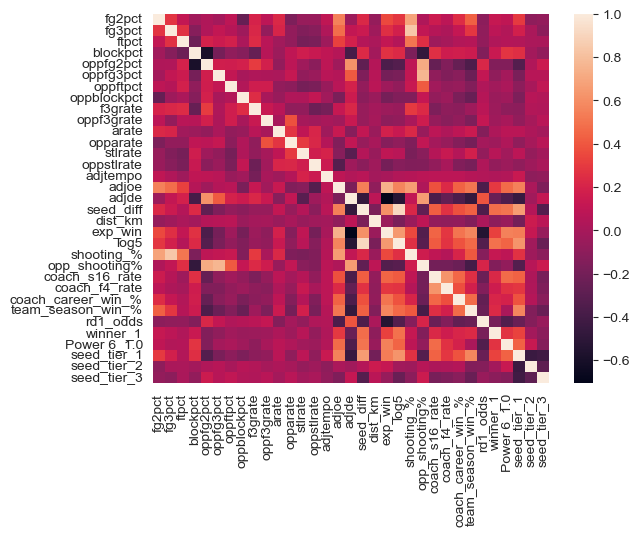

In [17]:
# Import seaborn
import seaborn as sns

# Create correlation matrix
df4heatmaps = df_modeling

# Compute the correlation matrix 
corr = df4heatmaps.corr()

# Draw the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [18]:
# Logit Model: Predict Winner

# Import packages
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# Separate the predictor values and the DV values into X and y respectively
# Placeholder variable: DV
y_logit = df_train[DV]
x_logit = df_train.drop(columns=[DV])

# Function to get summary coefficients
def summary_coef(model_object):
    n_predictors = x_logit.shape[1]
    model_coef = pd.DataFrame(model_object.coef_.reshape(1, n_predictors), columns=x_logit.columns.values)
    model_coef['Intercept'] = model_object.intercept_
    return model_coef.transpose()

# Run Logistic regression with pre-specified penalty level (alpha)
# Placeholder variable: alpha
alpha = 10

# The Logistic regression results are put into a model object clf
clf_logit = LogisticRegression(C=1/alpha, penalty='l2', solver='lbfgs', max_iter=200, random_state=1).fit(x_logit,y_logit)

# Display summary coefficients
print(summary_coef(clf_logit))

# Placeholder variable: kfolds
kfolds = 5

# Here we specify within which range of the penalty levels we will search for the optimal penalty level, 
# i.e., the level that leads to the best model candidate
# We search the optimal alpha within [min_alpha, max_alpha]
min_alpha = 0.001
max_alpha = 100

# We further discretize the continuous alpha range [min_alpha, max_alpha] into n individual points of alpha
# We train n model candidates each of which corresponds to one individual alpha point
n_candidates = 1000

import numpy as np

# We store the list of individual alpha points into alpha_list
alpha_list = list(np.linspace(min_alpha, max_alpha, num=n_candidates))

# C_list is the element-wise inverse of alpha_list. It is required as one of the parameter values for LogisticRegressionCV
C_list = list(1/np.linspace(min_alpha, max_alpha, num=n_candidates))

# Set n_jobs to be -1 to run LogisticRegressionCV on all CPU cores.
clf_optimal_logit = LogisticRegressionCV(Cs=C_list, cv=kfolds, penalty='l1', solver='saga', max_iter=500, random_state=1, n_jobs=-1).fit(x_logit,y_logit)

# Display the estimated coefficients of the final selected model
print(summary_coef(clf_optimal_logit))

# Display the optimal alpha that yields the final selected model (the best model candidate)
print(1/clf_optimal_logit.C_)

# Calculate the error rate over the test partition based on the final selected model

# y_test_actual is the actual values of the DV in the test partition
y_test_actual_logit = df_test[DV]

# X_test is the predictor values in the test partition
X_test_logit = df_test.drop(columns=[DV])

# Use predict method of the clf_optimal object to apply the model associated with clf_optimal to the test partition
# y_test_predicted is the predicted values of the DV in the test partition 
y_test_predicted_logit = clf_optimal_logit.predict(X_test_logit)

# Import the metrics package
from sklearn import metrics

# Display the confusion matrix over the test partition
print(metrics.confusion_matrix(y_test_actual_logit, y_test_predicted_logit))

                           0
fg2pct              0.024922
fg3pct              0.049207
ftpct               0.022826
blockpct            0.136475
oppfg2pct           0.114757
oppfg3pct          -0.071899
oppftpct            0.045758
oppblockpct         0.025836
f3grate            -0.054632
oppf3grate         -0.021331
arate              -0.153914
opparate            0.041973
stlrate             0.110473
oppstlrate         -0.035518
adjtempo           -0.038018
adjoe              -0.035728
adjde              -0.033927
seed_diff           0.483774
dist_km            -0.032251
exp_win            -0.119661
log5                0.766828
shooting_%          0.049436
opp_shooting%       0.030474
coach_s16_rate     -0.038666
coach_f4_rate       0.013673
coach_career_win_%  0.100656
team_season_win_%   0.059945
rd1_odds           -0.041605
Power 6_1.0         0.283973
seed_tier_1         0.005593
seed_tier_2         0.005889
seed_tier_3         0.295064
Intercept          -0.289639
              

In [19]:
# Display the accuracy over the test partition
print(clf_optimal_logit.score(X_test_logit, y_test_actual_logit)) # 71% with model_features (2nd one), 72% with other list

0.7134268537074149


In [20]:
# Prepare 2019 data for predictions

# Make copy of 2019 df for testing
df_2019_test = df_2019.copy()

# Drop columns from 2019 dataset
drop_cols_modeling = ['game_id', 'id', 'coach_id', 'year', 'team', 'seed']
df_2019_test = df_2019_test.drop(columns=drop_cols_modeling)

# Get dummies for 2019 dataset
df_2019_test = pd.get_dummies(df_2019_test, prefix_sep='_')
rdummies = ['winner_0', 'seed_tier_4', 'Power 6_0.0']
df_2019_test = df_2019_test.drop(columns=rdummies)

# Standardize 2019 dataset
df_2019_test_normalized = df_2019_test.copy()
df_2019_test_normalized[nvar_list] = (df_2019_test_normalized[nvar_list] - df_2019_test_normalized[nvar_list].mean())/df_2019_test_normalized[nvar_list].std()

# Get model features
df_2019_test = df_2019_test[model_features]
df_2019_test_normalized = df_2019_test_normalized[model_features]

In [21]:
# Predict 2019 game results for initial csv submission

# Create copy of df
df_2019_predict = df_2019_test_normalized.copy()
df_2019_predict = df_2019_predict.drop(columns=DV)
predictWinner = clf_optimal_logit.predict_proba(df_2019_predict)[:,1]

# Convert list of predictions for 2019 to df
df_predictedWinners = pd.DataFrame(predictWinner).reset_index(drop=True)

# Get game_id from original 2019 df
df_2019_Winners = df_2019.copy()
#df_2019_Winners = df_2019_Winners[df_2019_Winners['winner'] == 1]

# Get game_id for predictions df
df_2019_Winners_games = df_2019_Winners['game_id'].reset_index(drop=True)

# Join 2 datasets to get the predicted win probability for each game
df_2019_Predictions_logit = pd.merge(df_predictedWinners, df_2019_Winners_games, left_index=True, right_index=True)

# Rename and reorder fields
df_2019_Predictions_logit = df_2019_Predictions_logit.rename(columns={0: 'prob'})
df_2019_Predictions_logit = df_2019_Predictions_logit[['game_id', 'prob']]

# Preview df
df_2019_Predictions_logit.head(10)

# Round predictions to 4 decimal places
df_2019_Predictions_logit['prob'] = df_2019_Predictions_logit['prob'].round(decimals=4)

# Preview results
df_2019_Predictions_logit

# Output df to csv
#df_2019_Predictions_logit.to_csv('2019 Predictions.csv', index=False)

,game_id,prob
0,2019-1113-1385,0.5331
1,2019-1113-1385,0.4548
2,2019-1120-1242,0.5288
3,2019-1120-1242,0.5312
4,2019-1120-1246,0.6636
...,...,...
129,2019-1439-1387,0.8025
130,2019-1449-1429,0.5178
131,2019-1449-1429,0.4975
132,2019-1459-1371,0.6508


In [22]:
# KPI metrics

# Log Loss
from sklearn.metrics import log_loss

# Get actual results
y_true = df_2019_Winners['winner'].tolist()

# Get predicted
y_predicted = df_2019_Predictions_logit['prob'].tolist()

# Calculate log loss
loss = log_loss(y_true, y_predicted)

# Show log loss
loss # 0.477

# AUC
from sklearn import metrics
auc = metrics.roc_auc_score(y_true, y_predicted)
print(f"AUC is {auc.round(5)}, Log Loss is {loss.round(5)}")

AUC is 0.84161, Log Loss is 0.49665


In [23]:

# Write output files
from datetime import date
date_stamp = str(date.today())

# Write output files
df_cleaned.to_excel("Output Data_Review_"+date_stamp+".xlsx")
df_main[model_features].to_excel("Training Data_CT_"+date_stamp+".xlsx")
df_modeling.to_excel("Training Data_Standardized_"+date_stamp+".xlsx")
df_2019_test.to_excel("2019 Testing Data_CT_"+date_stamp+".xlsx")
df_2019_test_normalized.to_excel("2019 Testing Data_Standardized_"+date_stamp+".xlsx")
